In [271]:
from IPython.display import display, HTML
display(HTML("<style>.container{width:100%;}</style>"))
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import scipy as sp
from scipy.optimize import minimize
%matplotlib notebook

In [235]:
DCNT = pd.read_csv('settings/countries.csv')
CNT_NAMES = list(DCNT['name'])
CNT_POPUL = np.array(DCNT['population']) #/1000
DCNT.head()

,iso_alpha2,iso_alpha3,iso_numeric,name,official_name,ccse_name,density,fertility_rate,land_area,median_age,migrants,population,urban_pop_rate,world_share
0,AF,AFG,4,Afghanistan,Islamic Republic of Afghanistan,Afghanistan,60,4.6,652860,18.0,-62920.0,38928346,0.25,0.0050
1,AL,ALB,8,Albania,Republic of Albania,Albania,105,1.6,27400,36.0,-14000.0,2877797,0.63,0.0004
2,DZ,DZA,12,Algeria,People's Democratic Republic of Algeria,Algeria,18,3.1,2381740,29.0,-10000.0,43851044,0.73,0.0056
3,AD,AND,20,Andorra,Principality of Andorra,Andorra,164,NaN,470,NaN,NaN,77265,0.88,0.0000
4,AO,AGO,24,Angola,Republic of Angola,Angola,26,5.6,1246700,17.0,6413.0,32866272,0.67,0.0042


In [236]:
START_DATE = datetime.strptime("2019-12-31 00:00:00", "%Y-%m-%d %H:%M:%S")
def get_day_num(date):
    try: date = datetime.strptime(date, "%Y-%m-%d")
    except: pass
    return (date - START_DATE).days

def prepare_dataset(filename):
    df = pd.read_csv(filename).drop('country', axis=1).set_index('Country/Region').transpose()
    df['daynum'] = df.index.to_series().apply(get_day_num)
    return df # / 1000

def plot_dataset(df, ax=None, legend=True, height=6, width=12):
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=(width, height))
    cnts = filter(lambda x: x[0].upper() == x[0], df.columns.values)
    if legend:
        for c in cnts:
            ax.plot(df['daynum'], df[c], label=c)
        ax.legend()
    else:
        ax.plot(df['daynum'], df[cnts])

def dataset_to_matrix(df):
    cnts = CNT_NAMES #list(filter(lambda x: x[0].upper() == x[0], df.columns.values))
    return cnts, np.array(df[cnts]).T
    

print(f"Day number {get_day_num(datetime.now())}")

Day number 104


In [237]:
dConf = prepare_dataset("data/conf_merged.csv")
dDeath = prepare_dataset("data/deaths_merged.csv")
display(dConf.head())
display(dDeath.head())

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Azerbaijan,Argentina,Australia,Austria,...,Egypt,United Kingdom,"Tanzania, United Republic of",United States,Burkina Faso,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of",Zambia,daynum
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,24
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,25
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Azerbaijan,Argentina,Australia,Austria,...,Egypt,United Kingdom,"Tanzania, United Republic of",United States,Burkina Faso,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of",Zambia,daynum
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26


In [238]:
cConf, xConf = dataset_to_matrix(dConf)
cDead, xDead = dataset_to_matrix(dDeath)
xConf.shape, xDead.shape

((169, 81), (169, 81))

In [240]:
# Make constants
from collections import OrderedDict
V = OrderedDict()
V['N_0'] = np.expand_dims(CNT_POPUL, axis=1)
V['dI/dt'] = np.diff(xConf, axis=1)
V['dD/dt'] = np.diff(xDead, axis=1)
V['I'] = xConf[:,:-1]
V['D'] = xDead[:,:-1]
V['N_0*I'] = V['N_0']*V['I']
V['N_0*D'] = V['N_0']*V['D']
V['I*D'] = V['I']*V['D']
V['I^2']= V['I']*V['I']

# Make variables string
S = [1, 'x', 'y', 'z', 'zx/y', 'zy/x']

# Coefficients for the first equation
Z = np.zeros_like(V['I'])

EQ1 = [V['dI/dt'], -V['I^2'], V['I*D'], V['N_0*I'], Z, -V['N_0*D']]
# EQ1 = [V['dI/dt'], -V['I^2'] + V['I*D'], Z, V['N_0*I'] - V['N_0*D'], Z, Z]
# EQ1 = [V['dI/dt'], -V['I^2'], Z, V['N_0*I'], Z, Z]

EQ2 = [V['dD/dt'], Z, Z, -V['D'], V['I'], Z]
# EQ2 = [V['dD/dt'], Z, Z, V['I'] - V['D'], Z, Z]
# EQ2 = [V['dD/dt'], Z, Z, Z, V['I'], Z]


def solve_for_row(row_idx, days_ago=1):
    assert days_ago > 0, "Only can use data older than or equal to 1 day ago"
    days_before = days_ago - 1
    slicer = (lambda x: x[:-days_before]) if days_before > 0 else (lambda x: x)
    eq1 = [slicer(i[row_idx]) for i in EQ1]
    eq2 = [slicer(i[row_idx]) for i in EQ2]
    A = np.vstack([np.vstack(eq1[1:]).T, np.vstack(eq2[1:]).T])
    Y = np.hstack([eq1[0], eq2[0]]).T
    X = np.linalg.lstsq(A, Y)[0]
    return X #[max(0, i) for i in X]

def make_prediction(I, D, X, N0):
    dI = X[2]*N0*I - X[4]*N0*D - X[0]*I*I + X[1]*D*I
    dD = X[3]*I - X[2]*D
#     dI = X[2]*N0*I - X[2]*N0*D - X[0]*I*I + X[1]*D*I
#     dD = X[2]*I - X[2]*D
#     dI = max(0, dI)
#     dD = max(0, dD)
    return I + dI, D + dD

def check_prediction(row_idx, days_ago=1):
    X = solve_for_row(row_idx=row_idx, days_ago=days_ago)
    I, D = xConf[row_idx, -days_ago], xDead[row_idx, -days_ago]
    I0, D0 = V['I'][row_idx, -days_ago], V['D'][row_idx, -days_ago]
    I1, D1 = make_prediction(I0, D0, X, V['N_0'][row_idx][0])
    return (I0, I, I1), (D0, D, D1)

def get_predictions(row_idx, days_ago=1, length=7):
    X = solve_for_row(row_idx=row_idx, days_ago=days_ago)
    print(X)
    N = V['N_0'][row_idx][0]
    I0, D0 = [V['I'][row_idx, -days_ago]], [V['D'][row_idx, -days_ago]]
    for i in range(length):
        I1, D1 = make_prediction(I0[-1], D0[-1], X, N)
        I0.append(I1)
        D0.append(D1)
    return np.array(I0[1:]), np.array(D0[1:])

'Russian Federation'

<IPython.core.display.Javascript object>


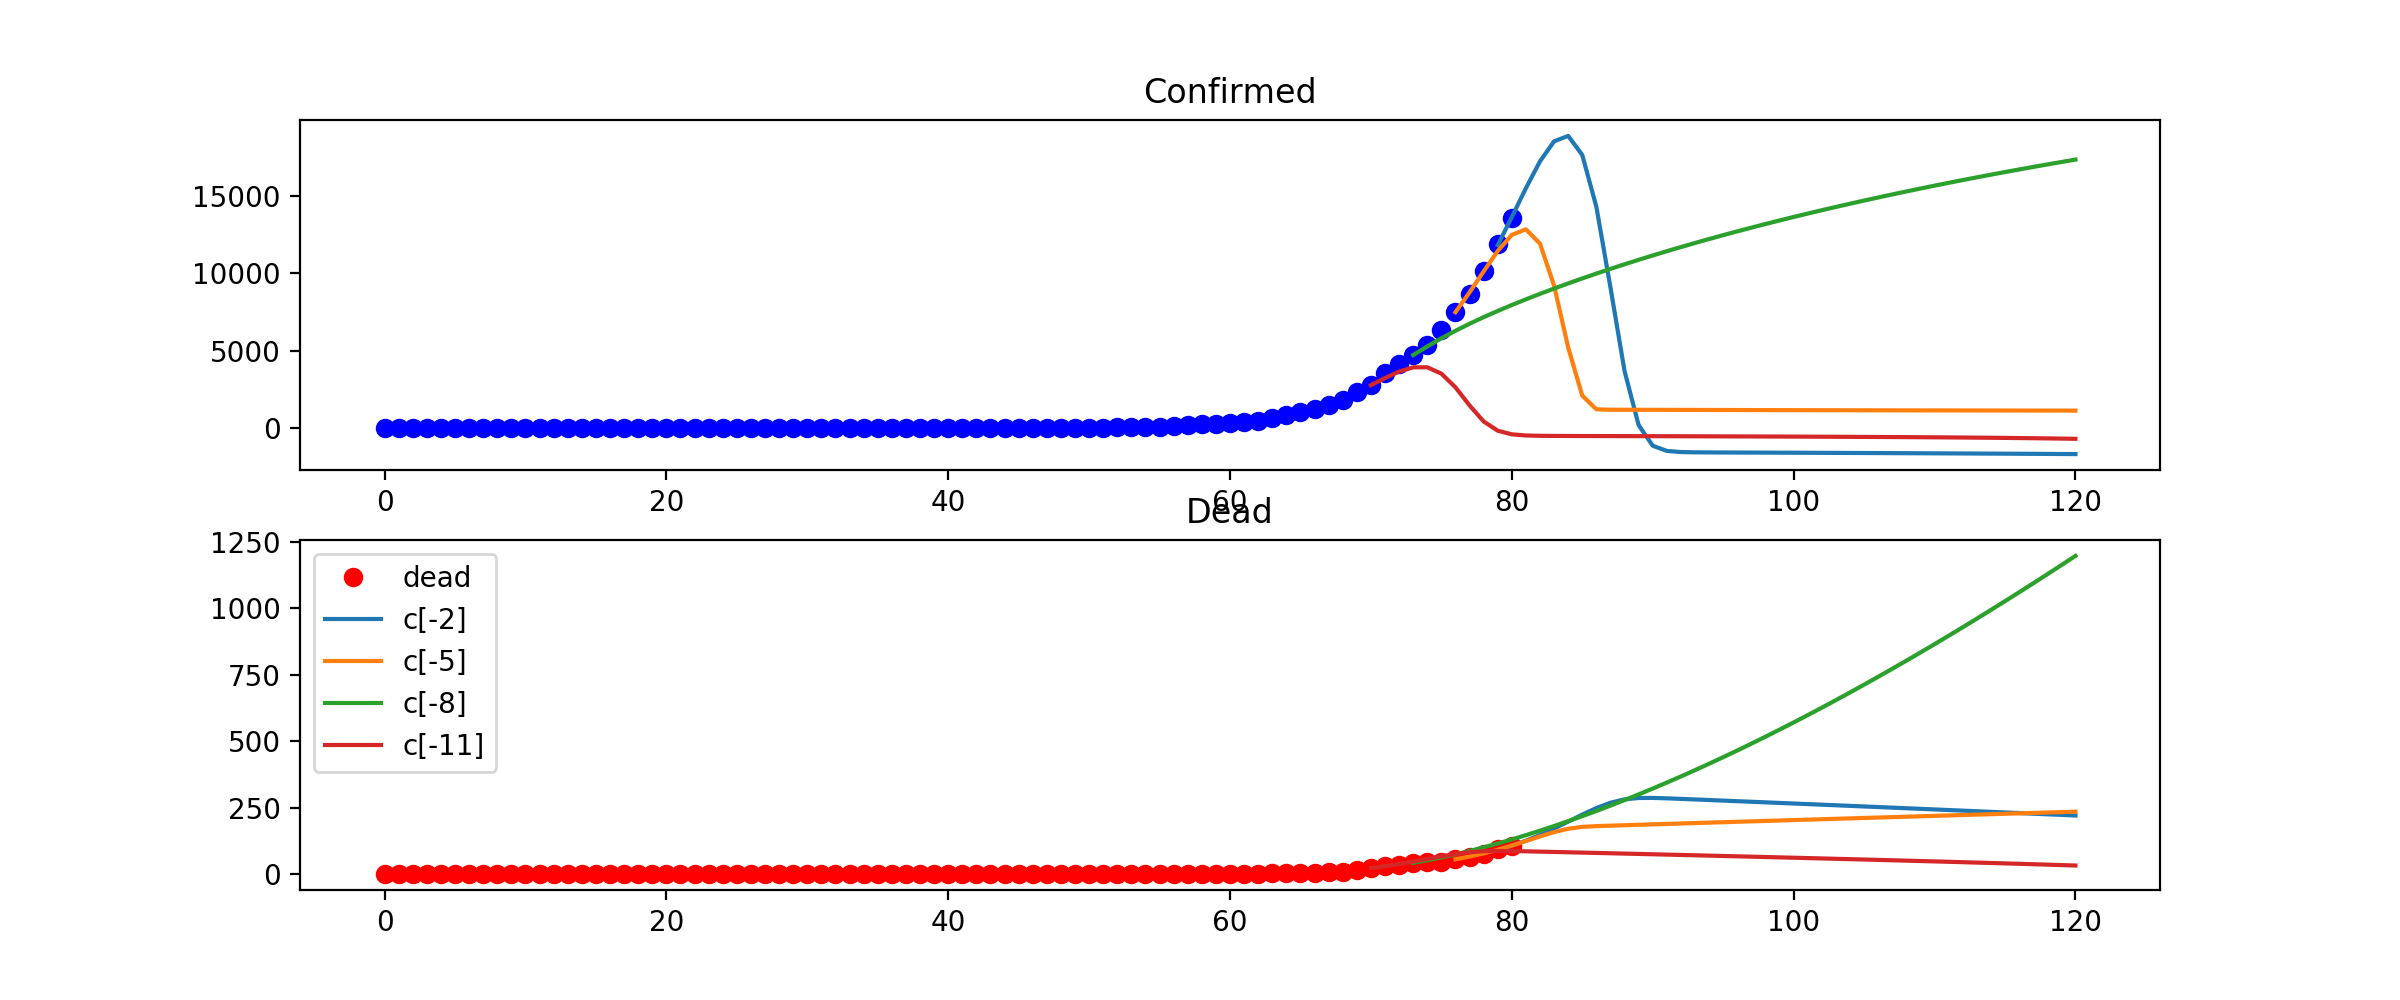

[-2.16127126e-05 -3.35412149e-03  1.59293569e-09  1.39934148e-03
  2.82401759e-08]
[-4.59734066e-05 -7.35202548e-03  1.24180481e-09  1.36438006e-03
 -4.96517337e-08]
[ 5.88810273e-05 -7.34711472e-04  1.40904864e-09  2.02142904e-03
 -1.68956255e-07]
[-7.67844206e-05 -9.78342154e-03  1.41233733e-09  2.50423104e-03
  2.64428950e-08]


/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default a

In [241]:
#idx = (xConf == 0).sum(axis=1).argmin()
idx = cConf.index('Russian Federation')
display(cConf[idx])
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].set_title('Confirmed')
ax[1].set_title('Dead')
ax[0].plot(xConf[idx], 'bo', label='confirmed')
ax[1].plot(xDead[idx], 'ro', label='dead')
FWD = 40
for i in range(2, 12, 3):
    I, D = get_predictions(idx, days_ago=i, length=i + FWD)
    ax[0].plot(range(xConf.shape[1] - i, xConf.shape[1] + FWD), I, label=f'c[-{i}]')
    ax[1].plot(range(xDead.shape[1] - i, xDead.shape[1] + FWD), D, label=f'c[-{i}]')
plt.legend()

In [244]:
for i in range(2, 0, -1):
    print(i, check_prediction(idx, days_ago=i))

2 ((10131.0, 11917.0, 11808.624104730778), (76.0, 94.0, 90.17672845806403))
1 ((11917.0, 13584.0, 13587.246181965038), (94.0, 106.0, 109.40149971645175))


/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [243]:
for i in range(2, 0, -1):
    print(i, solve_for_row(idx, days_ago=i))

2 [-2.16127126e-05 -3.35412149e-03  1.59293569e-09  1.39934148e-03
  2.82401759e-08]
1 [-2.38856108e-05 -3.68401293e-03  1.56080912e-09  1.29239740e-03
  2.25579943e-08]


/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [306]:
def create_evo_func(N0, a, b, p, q):
    def evo_func(F, O):
        Delta = (F - O)
        dF = a*(N0 - F)*Delta
        dO = b*Delta
        return dF, dO
    return evo_func

def evo(X, Y, evo_func, length=12):
    aX, aY = np.zeros(length), np.zeros(length)
    for i in range(length):
        dX, dY = evo_func(X, Y)
        X += dX
        Y += dY
        aX[i] = X
        aY[i] = Y
    return aX, aY

def log_loss(X0, X):
    return np.sum(np.abs(np.log10((1 + X0)/(1 + X))))

def opt_evo(X0, Y0, N0):
    nm = (X0==0).sum()
    X0, Y0 = X0[nm:], Y0[nm:]
    def func(t):
        a, b, p, q, f0, o0 = t
        f = create_evo_func(N0, a, b, p, q)
        F, O = evo(f0, o0, f, length=len(X0))
        return log_loss(X0, p*F) + log_loss(Y0, q*O)
    res = minimize(func, np.array([1e-9, 1e-9, 1e-9, 1e-9, 1., 0.]), bounds=[(0., None), (0., None), (0., None), (0., None), (0., None), (0., None)])
    return res.x, nm

'Russian Federation'

Population: 145934462
1e-09 1e-09 1e-09 1e-09 1.0 0.0


/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/home/aynur/Installed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


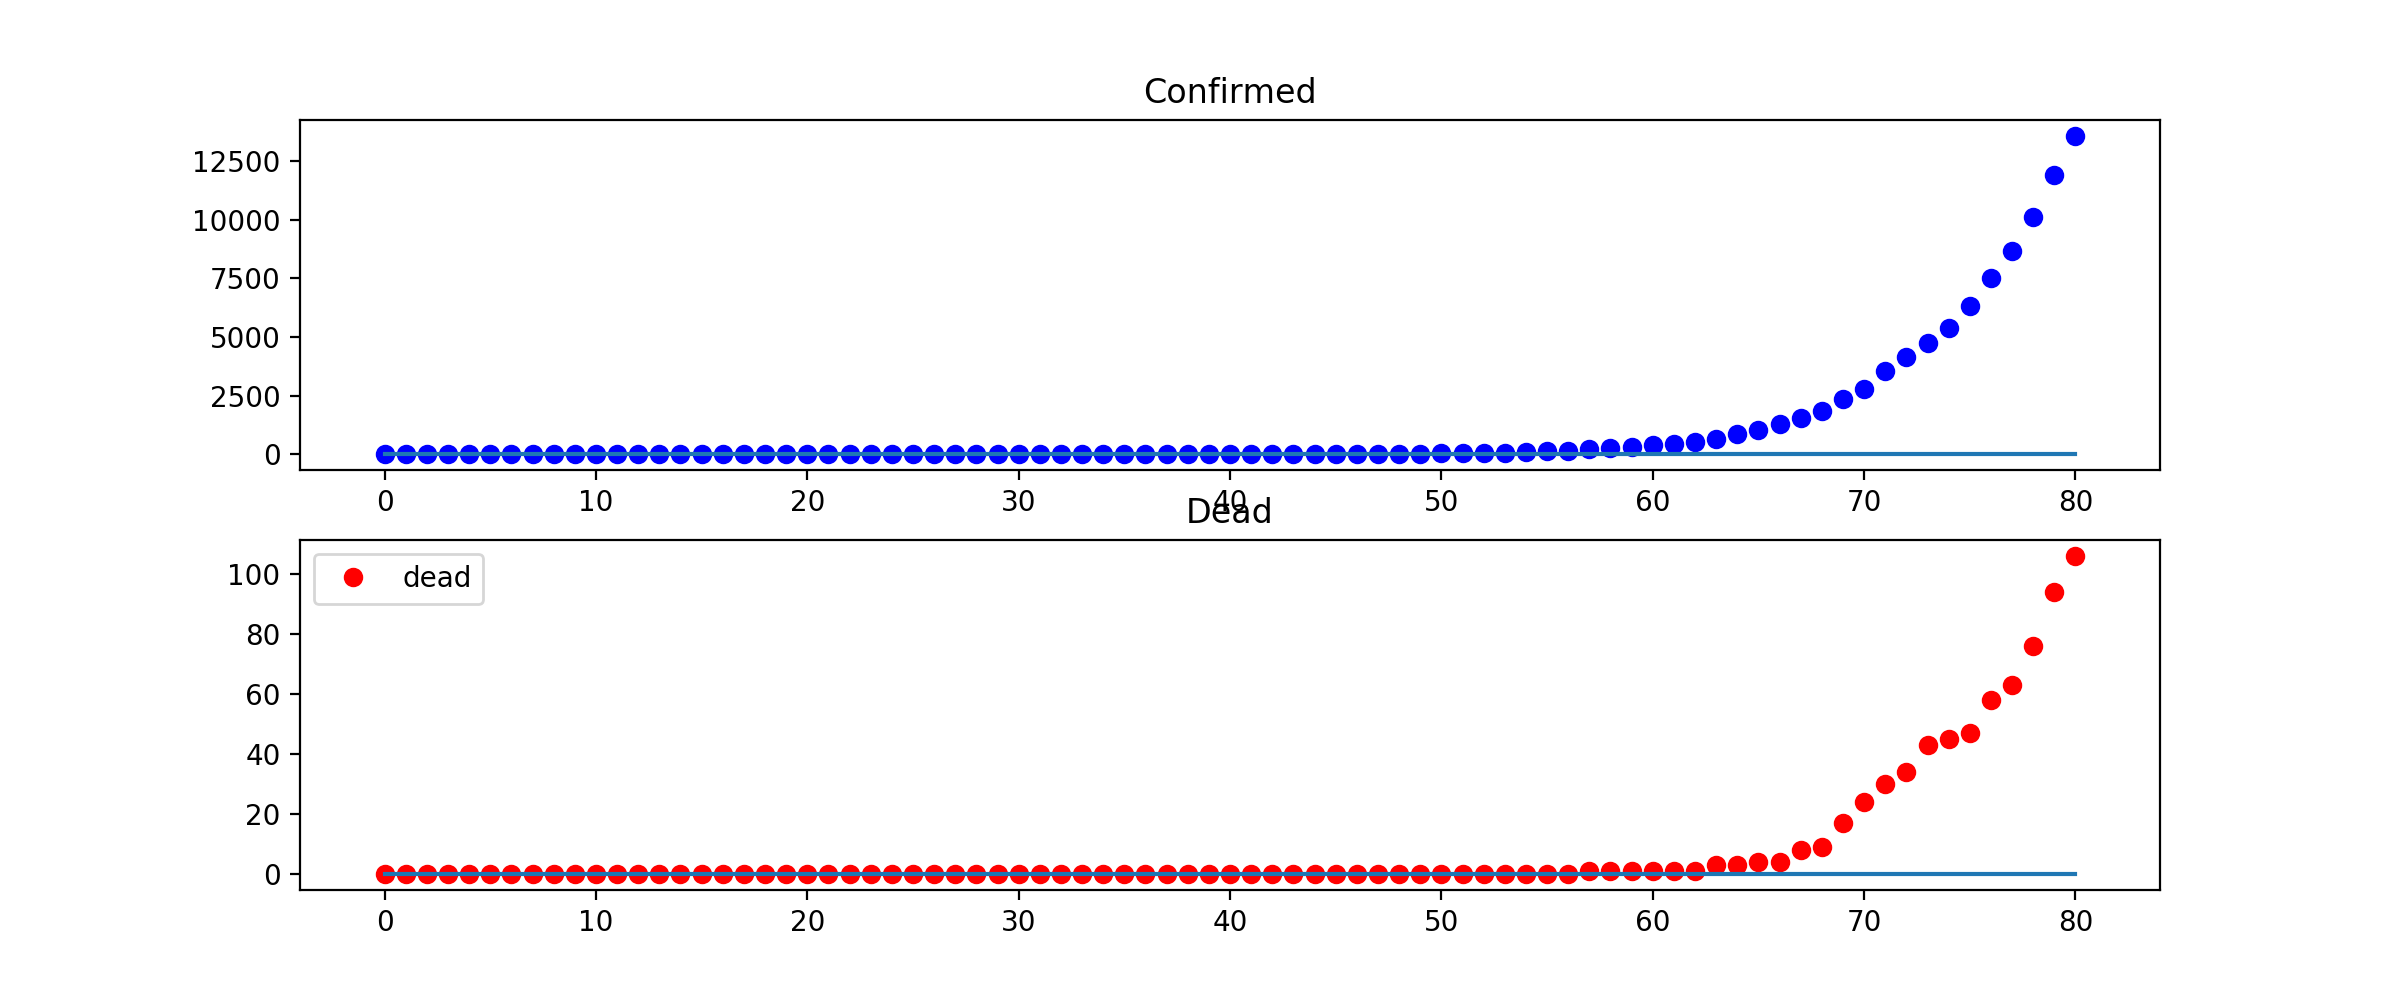

In [308]:
#idx = (xConf == 0).sum(axis=1).argmin()
idx = cConf.index('Russian Federation')
display(cConf[idx])

N = CNT_POPUL[idx]
print(f"Population: {N}")

(a, b, p, q, f0, o0), nm = opt_evo(xConf[idx], xDead[idx], N)

print(a, b, p, q, f0, o0)

evo_func = create_evo_func(N, a, b, p, q)

fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].set_title('Confirmed')
ax[1].set_title('Dead')
ax[0].plot(xConf[idx], 'bo', label='confirmed')
ax[1].plot(xDead[idx], 'ro', label='dead')

# FWD = 100

resF, resO = evo(f0, o0, evo_func, length=xConf.shape[1] - nm)
resConf, resDead = np.zeros_like(xConf[idx]), np.zeros_like(xDead[idx])
resConf[-resF.shape[0]:], resDead[-resO.shape[0]:] = p*resF, q*resO
ax[0].plot(range(resConf.shape[0]), resConf, label=f'')
ax[1].plot(range(resDead.shape[0]), resDead, label=f'')
plt.legend()